# Question 1: What is K-Nearest Neighbors (KNN) and how does it work in both classification and regression problems?

K-Nearest Neighbors (KNN)

KNN is a supervised machine learning algorithm used for classification and regression tasks. It is called a “lazy learner” because it does not build an explicit model during training; instead, it makes predictions only when new data is given.

The key idea is:
➡️ “A data point will likely belong to the same class (or have a similar value) as its nearest neighbors.”

- How KNN Works

Choose the number of neighbors k.

Calculate the distance (commonly Euclidean distance) between the new data point and all points in the dataset.

Identify the k nearest neighbors.

Make a prediction:

For classification → use majority voting among the k neighbors.

For regression → use the average (or weighted average) of the k neighbors’ values.

- KNN in Classification

Example: Predicting whether a fruit is an apple or orange based on weight & color.

Suppose k = 5.

Find the 5 nearest neighbors of the new fruit.

If 3 are “apples” and 2 are “oranges,” the algorithm predicts apple (majority class).

👉 KNN works best when decision boundaries are non-linear and irregular.

- KNN in Regression

Example: Predicting the price of a house based on its size & location.

Suppose k = 4.

Find the 4 nearest houses.

Take the average price of those houses.

Assign that as the predicted price.

👉 In regression, instead of voting, KNN takes the mean (or weighted mean, giving closer neighbors more influence).


# Question 2: What is the Curse of Dimensionality and how does it affect KNN performance?

Curse of Dimensionality

The “curse of dimensionality” refers to the problems that arise when working with data that has too many features (dimensions).

- Effect on KNN

Since KNN heavily relies on distance calculations, the curse of dimensionality impacts it badly:

Neighbors become less distinguishable

In low dimensions (2D or 3D), distances make sense (close points really are close).

In high dimensions (100+ features), all points tend to look equally far apart.

So, KNN struggles to identify meaningful nearest neighbors.

High computational cost

Distance must be calculated across all dimensions for every prediction.

More dimensions → more calculations → slower performance.

Overfitting risk

With too many dimensions, KNN may memorize training data and fail to generalize well.


# Question 3: What is Principal Component Analysis (PCA)? How is it different from feature selection?

Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique used to transform a large set of features into a smaller set while keeping most of the original information.

| **Aspect**           | **PCA (Feature Extraction)**                                                     | **Feature Selection**                                              |
| -------------------- | -------------------------------------------------------------------------------- | ------------------------------------------------------------------ |
| **Definition**       | Creates new features (principal components) as combinations of original features | Chooses the most important original features and discards the rest |
| **Output**           | Transformed features (not interpretable directly, e.g., PC1, PC2)                | Subset of original features (easy to interpret)                    |
| **Approach**         | **Feature extraction** (mathematical transformation)                             | **Feature selection** (ranking or filtering features)              |
| **Goal**             | Reduce dimensionality while keeping maximum variance                             | Keep only relevant/important features                              |
| **Interpretability** | Harder to interpret (PC1, PC2 don’t have direct meaning)                         | Easier, since original features are retained                       |


# Question 4: What are eigenvalues and eigenvectors in PCA, and why are they important?

- igenvalues and Eigenvectors (in PCA)

When we apply PCA, we perform linear algebra operations on the covariance matrix of the data.

The covariance matrix shows how features vary with each other.

To find the "directions" of maximum variance, we compute eigenvectors and eigenvalues.

- Eigenvectors

Eigenvectors represent the directions (axes) of maximum variance in the data.

In PCA, each principal component is an eigenvector of the covariance matrix.

Example: In 2D data, eigenvectors might be diagonal lines (directions) where the data spreads the most.

- Eigenvalues

Eigenvalues represent the amount of variance captured by each eigenvector (principal component).

Larger eigenvalue → that direction (eigenvector) explains more variance in the data.

Example: If eigenvalue of PC1 is 5 and PC2 is 1, then PC1 explains 5 times more variance than PC2.

- Why are they important in PCA?

Eigenvectors → Principal Components

They define the new feature space (the rotated axes where data is projected).

Eigenvalues → Variance Explained

They tell us how much information (variance) each principal component retains.

This helps decide how many components to keep (e.g., 95% variance threshold).

# Question 5: How do KNN and PCA complement each other when applied in a single pipeline?

- How KNN and PCA Complement Each Other

Problem with KNN

KNN relies on distance metrics (Euclidean, Manhattan, etc.).

In high dimensions, distances become less meaningful (curse of dimensionality).

Result → KNN performance drops.

Role of PCA

PCA reduces dimensionality by keeping only the components that capture the most variance.

Removes noise and redundant features.

Creates a compact feature space where distances are more meaningful.

KNN after PCA

With fewer, informative dimensions → distance calculations are more reliable.

KNN runs faster (less computation).

Often improves accuracy because noisy/irrelevant dimensions are discarded.

Explained variance ratio: [0.36198848 0.1920749 ]
KNN Accuracy with PCA (2 components): 1.0


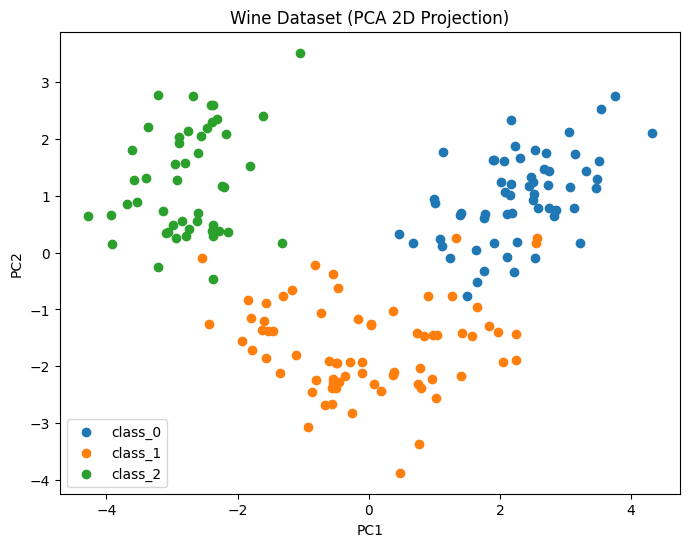

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (reduce to 2D for visualization, but keep higher for performance)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 6. Predictions & accuracy
y_pred = knn.predict(X_test)
print("KNN Accuracy with PCA (2 components):", accuracy_score(y_test, y_pred))

# 7. Visualization (2D PCA space)
plt.figure(figsize=(8,6))
for i, target in enumerate(np.unique(y)):
    plt.scatter(X_pca[y==target, 0], X_pca[y==target, 1], label=wine.target_names[i])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Wine Dataset (PCA 2D Projection)")
plt.legend()
plt.show()


# Question 6: Train a KNN Classifier on the Wine dataset with and without feature scaling. Compare model accuracy in both cases.




In [2]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------- Without Scaling ----------------
knn_no_scaling = KNeighborsClassifier(n_neighbors=5)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# ---------------- With Scaling ----------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaling = KNeighborsClassifier(n_neighbors=5)
knn_scaling.fit(X_train_scaled, y_train)
y_pred_scaling = knn_scaling.predict(X_test_scaled)
acc_scaling = accuracy_score(y_test, y_pred_scaling)

# Print results
print("Accuracy without scaling:", acc_no_scaling)
print("Accuracy with scaling:", acc_scaling)


Accuracy without scaling: 0.7222222222222222
Accuracy with scaling: 0.9444444444444444


# Question 7: Train a PCA model on the Wine dataset and print the explained variance ratio of each principal component.

In [3]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA (keep all components)
pca = PCA(n_components=X.shape[1])  # 13 components
pca.fit(X_scaled)

# 4. Print explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(explained_variance, 1):
    print(f"PC{i}: {ratio:.4f}")

print("\nTotal variance explained:", explained_variance.sum())


Explained Variance Ratio for each component:
PC1: 0.3620
PC2: 0.1921
PC3: 0.1112
PC4: 0.0707
PC5: 0.0656
PC6: 0.0494
PC7: 0.0424
PC8: 0.0268
PC9: 0.0222
PC10: 0.0193
PC11: 0.0174
PC12: 0.0130
PC13: 0.0080

Total variance explained: 1.0


Question 8: Train a KNN Classifier on the PCA-transformed dataset (retain top 2
components). Compare the accuracy with the original dataset.


In [5]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ---------------- KNN on Original Data ----------------
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# ---------------- PCA Transformation ----------------
pca = PCA(n_components=2)   # keep top 2 components
X_pca = pca.fit_transform(X_scaled)

# Split PCA dataset
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# ---------------- KNN on PCA Data ----------------
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)

# Print results
print("Accuracy with Original Data:", acc_original)
print("Accuracy with PCA Data:", acc_pca)


Accuracy with Original Data: 0.9444444444444444
Accuracy with PCA Data: 1.0


# Question 9: Train a KNN Classifier with different distance metrics (euclidean,manhattan) on the scaled Wine dataset and compare the results.



In [6]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# ---------------- KNN with Euclidean distance ----------------
knn_euclidean = KNeighborsClassifier(n_neighbors=5, metric="euclidean")
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
acc_euclidean = accuracy_score(y_test, y_pred_euclidean)

# ---------------- KNN with Manhattan distance ----------------
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
acc_manhattan = accuracy_score(y_test, y_pred_manhattan)

# ---------------- Results ----------------
print("KNN Accuracy (Euclidean distance):", acc_euclidean)
print("KNN Accuracy (Manhattan distance):", acc_manhattan)


KNN Accuracy (Euclidean distance): 0.9444444444444444
KNN Accuracy (Manhattan distance): 0.9444444444444444


# Question 10: You are working with a high-dimensional gene expression dataset to classify patients with different types of cancer. Due to the large number of features and a small number of samples, traditional models overfit.
# Explain how you would:
# ● Use PCA to reduce dimensionality
# ● Decide how many components to keep
# ● Use KNN for classification post-dimensionality reduction
# ● Evaluate the model
# ● Justify this pipeline to your stakeholders as a robust solution for real-world  biomedical data


1. Using PCA to Reduce Dimensionality

Gene expression data is very high-dimensional and noisy.

Many genes are correlated or irrelevant to cancer classification.

Apply PCA after feature scaling (e.g., StandardScaler).

PCA will create new features (principal components) that capture the most variance in the data while discarding noise.

👉 This reduces redundancy, removes noise, and makes distances more meaningful for KNN.

2. Deciding How Many Components to Keep

Compute explained variance ratio of each principal component.

Create a scree plot (variance explained vs component number).

Keep enough components to explain ~90–95% of variance.

This balances information retention vs dimensionality reduction.

👉 For example, reduce from 20,000 genes → 50–100 principal components.

3. Using KNN for Classification

Apply KNN on PCA-transformed data.

Reason:

KNN works well in low dimensions but fails in very high dimensions (curse of dimensionality).

After PCA, distances between patients are more reliable.

Hyperparameters to tune:

Number of neighbors k.

Distance metric (Euclidean, Manhattan).

Weighting scheme (uniform vs distance-based).

4. Evaluating the Model

Use Stratified k-Fold Cross Validation due to small sample size (ensures class balance).

Evaluate with metrics like:

Accuracy (overall correctness).

Precision, Recall, F1-score (important for imbalanced classes).

Confusion Matrix (per-class performance).

If sample size is very small → consider Leave-One-Out Cross Validation (LOOCV).

5. Justifying the Pipeline to Stakeholders

When explaining to biomedical researchers or clinicians:

PCA:

“We reduce tens of thousands of noisy gene features into a smaller set of meaningful patterns (components). These capture the strongest biological signals without overfitting.”

KNN:

“We classify new patients by comparing them to the most similar past patients. This makes the model intuitive and interpretable for clinicians.”

Robustness:

“Cross-validation ensures the model is not just memorizing but can generalize to new patients.”

“Dimensionality reduction + KNN gives a balance between accuracy, simplicity, and interpretability, which is critical for biomedical applications.”

In [7]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load dataset
cancer = load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

print(df.head())
print("\nTarget names:", cancer.target_names)


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             